In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [284]:
exec(open("../../header.py").read())

# Import data

In [285]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [286]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

# Use class

In [287]:
exec(open("../../header.py").read())

In [288]:
ice = ICE("binary", trace = False)

In [289]:
ice.fit_single_feature(X, rf, "Age")

Fit Age in 1.80 seconds


Preprocessed data in 0.04 seconds
Plotted in 0.47 seconds


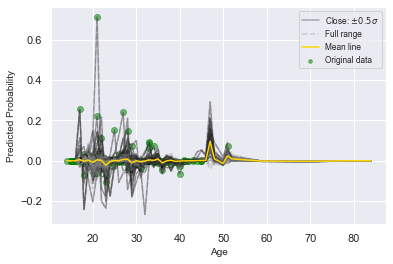

In [290]:
ice.ice_plot_single_feature('Age', plot_num = 200, mode = "d-ice")

In [291]:
ice.get_feature_impact("Age")

{'Feature': 'Age',
 'Feature Impact': 0.1519146106435773,
 'In-Dist Feature Impact': 0.1532652643376939}

In [292]:
ice.feature_impact_table()

,Feature,Feature Impact,In-Dist Feature Impact,Normalized Feature Impact,Normalized In-Dist Feature Impact
0,Age,0.151915,0.153265,100.0,100.0


In [ ]:
ice.fit(X, rf)

Fit Age in 1.71 seconds
Fit Number of sexual partners in 1.07 seconds
Fit First sexual intercourse in 2.29 seconds
Fit Num of pregnancies in 1.01 seconds
Fit Smokes in 0.83 seconds
Fit Smokes (years) in 1.45 seconds
Fit Smokes (packs/year) in 2.05 seconds
Fit Hormonal Contraceptives in 0.83 seconds
Fit Hormonal Contraceptives (years) in 1.61 seconds


In [ ]:
# ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))
ice.ice_plot(mode = "ice")

In [ ]:
# ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))
ice.ice_plot(mode = "c-ice")

In [ ]:
ice.feature_impact_hist(results_root("ice-plot-from-class/all_histograms.pdf"))

In [ ]:
b = pd.DataFrame({'Feature':X.columns, 
              'RF FI':rf.feature_importances_*100})\
    .round(3)

In [ ]:
a = ice.feature_impact_table()\
    .merge(b, how = "inner", on = "Feature")\
    .round(2)

In [ ]:
a\
    .sort_values('Normalized In-Dist Feature Impact', ascending = False)